# Image Patch Super Resolution 

## Tensorflow 

In [1]:
!pip install tensorrt
# !find / -name libnvinfer.so.8
!ln -s /home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer.so.8 /home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer.so.7
!ln -s /home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer_plugin.so.8 /home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer_plugin.so.7
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
ln: failed to create symbolic link '/home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer.so.7': File exists
ln: failed to create symbolic link '/home/j_yang/miniconda3/envs/ISRGAN/lib/python3.9/site-packages/tensorrt/libnvinfer_plugin.so.7': File exists


In [2]:
%reload_ext autoreload
%autoreload 2

import os
import tensorflow as tf
'''
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
'''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print("Tensorflow Version: ", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2022-12-14 15:33:18.973192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-14 15:33:19.705352: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 15:33:19.705424: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 15:33:19.705432: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Tensorflow Version:  2.11.0
Num GPUs Available:  0


## Dataset: DIV2K_train_HR with 800 2K images

In [ ]:
# Uncomment to download the original image dataset
# !wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

## Image Augmentation: 

- Random collect a fixed number of image patch from each of the 2K original images as training high-resolution dataset. 
- Down scale each of the high-resolution images as the training low-resolution dataset.

In [4]:
import utils  # utils.py
train_lr, train_hr = utils.image_dataset_loader(
    img_dir_path='data/DIV2K_train_HR/', 
    lr_shape=(64, 64, 3), 
    hr_shape=(256, 256, 3), 
    num_patch=3
)

  0%|          | 0/800 [00:00<?, ?it/s]

[INFO] The Dataset now has 2400 LR-HR image pairs.


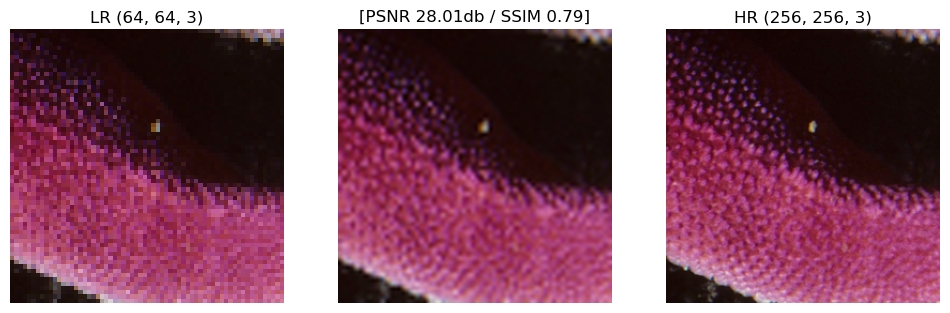

In [5]:
import cv2
test_hr_img = utils.img_norm(train_hr[0], norm_code=1)
test_lr_img = utils.img_norm(train_lr[0], norm_code=1)
test_bi_img = cv2.resize(test_lr_img, dsize=test_hr_img.shape[:2], interpolation=cv2.INTER_CUBIC)

utils.plot_images(test_lr_img, test_bi_img, test_hr_img)

## SRGAN model training

In [32]:
from SRGAN import SRGAN  # SRGAN.py
SRGAN(
    lr_shape=(64, 64, 3), 
    hr_shape=(256, 256, 3),
    show_summary=False
).train_gan(
    train_lr, 
    train_hr, 
    epochs=5, 
    batch_size=1, 
    steps_per_epoch=100,
    save_epoch_weights=False,
    save_final_weights=False
)

LR_INPUT trainable: True
Generator trainable: True
Discriminator trainable: False
VGG19_9 trainable: False

Epoch 1/5


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

## SRGAN model demo

LR_INPUT trainable: True
Generator trainable: True
Discriminator trainable: False
VGG19_9 trainable: False


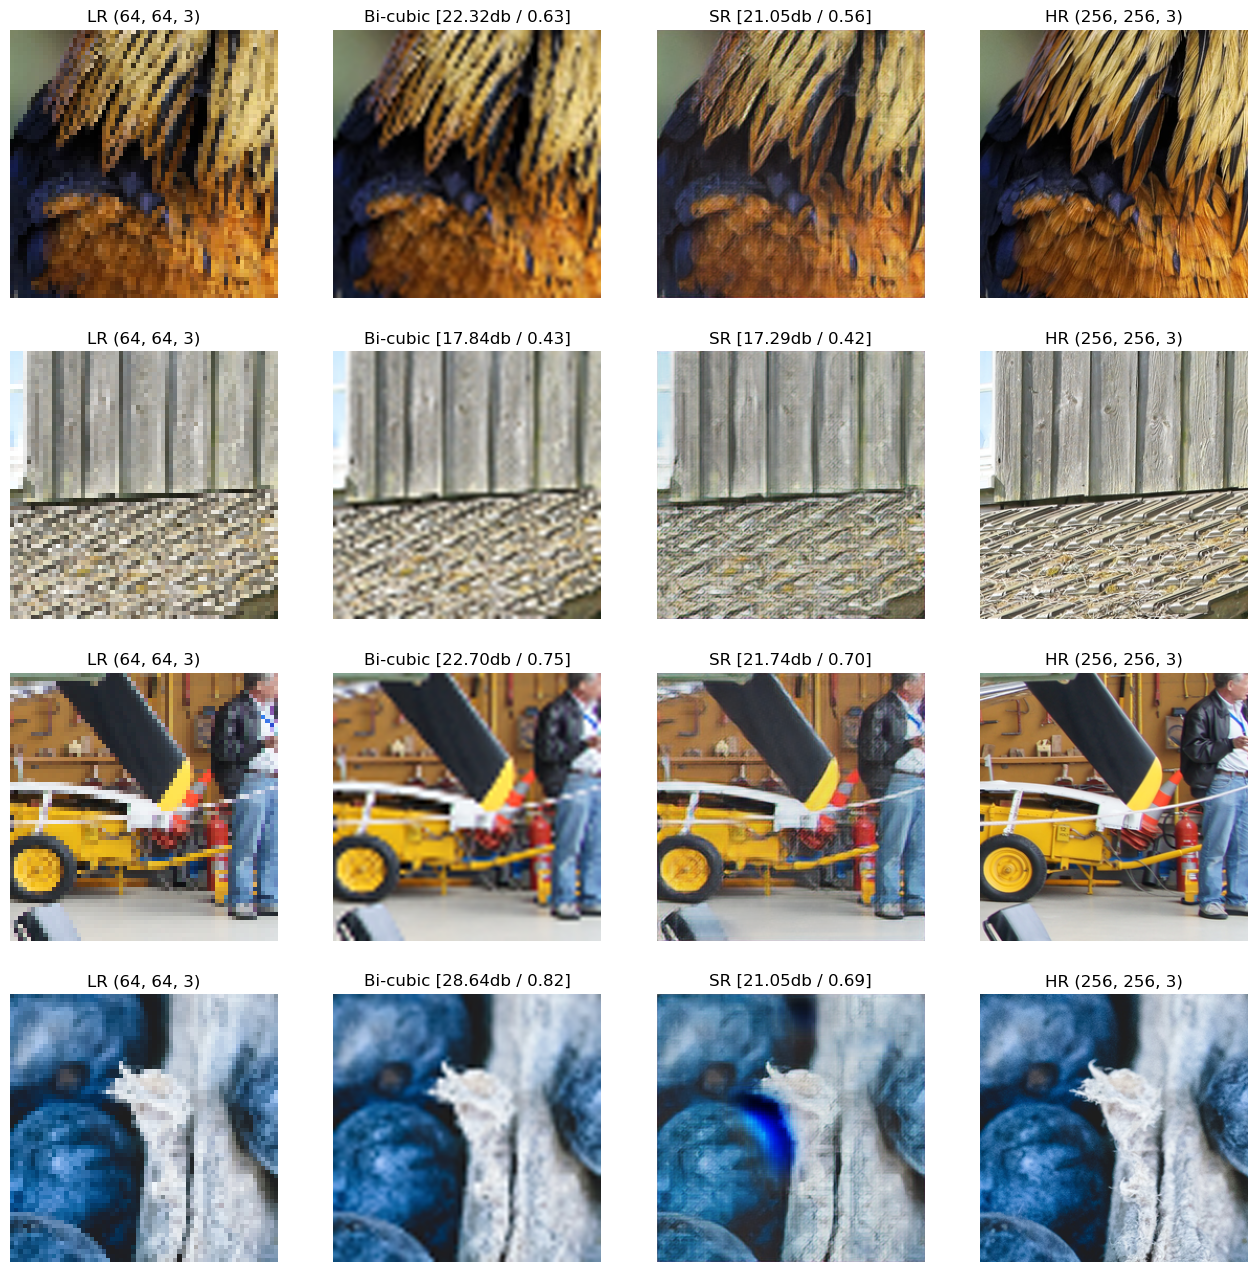

In [30]:
from SRGAN import SRGAN  # SRGAN.py
demo_srgan = SRGAN(
    lr_shape=(64, 64, 3), 
    hr_shape=(256, 256, 3)
)
# demo_srgan.gan_model.summary()

# load trained model weights
demo_srgan.load_gan_weights('model/gan_weights.h5')

# the generated comparison plot
utils.plot_predict(train_lr, train_hr, demo_srgan)